In [40]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') 

In [41]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [42]:
# Configure API key
quandl.ApiConfig.api_key = 'zZEosXhXs2pxDKXeUnEp'

In [43]:
data_1 = quandl.get('FRED/NROUST')

In [44]:
#Create path
path = '/Users/owner/Documents/Career foundry/Course 6'

In [45]:
# Import data
df = pd.read_csv(os.path.join(path, 'Cleaned Data', 'gun_violence_totals.csv'))

In [46]:
df.tail(20)

,Unnamed: 0,incident_id,date,state,city,address,people_killed,people_injured,year,month,monthday,day_of_week,hurt
471966,471966,480327,2013-02-11,Delaware,Wilmington,500 North King Street,3,2,2013,2,11,0,5
471967,471967,479603,2013-02-09,Louisiana,New Orleans,400 block of Bourbon Street,0,4,2013,2,9,5,4
471968,471968,479592,2013-02-07,Illinois,Chicago,2500 block of East 75th Street,0,4,2013,2,7,3,4
471969,471969,479580,2013-02-03,California,Yuba (county),5800 block of Poplar Avenue,1,3,2013,2,3,6,4
471970,471970,479573,2013-02-02,Tennessee,Memphis,2514 Mount Moriah,0,5,2013,2,2,5,5
471971,471971,479460,2013-01-26,Ohio,Springfield,601 West Main Street,1,3,2013,1,26,5,4
471972,471972,479554,2013-01-26,District of Columbia,Washington,2403 Benning Road Northeast,0,5,2013,1,26,5,5
471973,471973,479561,2013-01-26,Louisiana,Charenton,1000 block of Flat Town Road,2,3,2013,1,26,5,5
471974,471974,479413,2013-01-25,Missouri,Saint Louis,W Florissant Ave and Riverview Blvd,1,3,2013,1,25,4,4
471975,471975,492151,2013-01-23,Maryland,Baltimore,1500 block of W. Fayette St.,1,6,2013,1,23,2,7


In [47]:
df = df[df['date'].between('2014-01-01','2021-12-31')]

In [48]:
df.head(20)

,Unnamed: 0,incident_id,date,state,city,address,people_killed,people_injured,year,month,monthday,day_of_week,hurt
18230,18230,2203919,2021-12-31,Texas,Beaumont,1500 block of Cartwright St,1,0,2021,12,31,4,1
18231,18231,2201909,2021-12-31,Ohio,Cleveland,Rexford Ave,1,0,2021,12,31,4,1
18232,18232,2201237,2021-12-31,Washington,Spanaway,21600 block of 41st Ave E,1,0,2021,12,31,4,1
18233,18233,2201905,2021-12-31,Texas,Corpus Christi,4100 block of Brett St,0,1,2021,12,31,4,1
18234,18234,2200960,2021-12-31,North Dakota,Williston,NaN,1,0,2021,12,31,4,1
18235,18235,2201764,2021-12-31,Illinois,Chicago,8700 block of S Holland Rd,0,1,2021,12,31,4,1
18236,18236,2200946,2021-12-31,Texas,Bryan,700 block of Navidad St,0,1,2021,12,31,4,1
18237,18237,2200940,2021-12-31,Texas,Houston,7200 block of Long Dr,0,1,2021,12,31,4,1
18238,18238,2200938,2021-12-31,Texas,Houston,17700 block of Tomball Pkwy,0,1,2021,12,31,4,1
18239,18239,2201752,2021-12-31,Illinois,Chicago,2300 block of W 79th St,0,1,2021,12,31,4,1


In [49]:
data = quandl.get('FRED/NROUST', start_date='2014-01-01', end_date='2021-12-31')

In [50]:
data.head()

,Value
Date,
2014-01-01,5.045110
2014-04-01,4.956620
2014-07-01,4.887757
2014-10-01,4.838887
2015-01-01,4.810394


In [51]:
data.shape

(32, 1)

In [52]:
data.columns

Index(['Value'], dtype='object')

In [53]:
data_1.shape

(332, 1)

In [54]:
data_1.head(10)

,Value
Date,
1949-01-01,5.255053
1949-04-01,5.261516
1949-07-01,5.268013
1949-10-01,5.274564
1950-01-01,5.281182
1950-04-01,5.287866
1950-07-01,5.294604
1950-10-01,5.301367
1951-01-01,5.308113


I've created a subset of data covering the dates for my assignment. Instead of starting from 1949, I'm starting the data from 2013. This significantly decreases the number of data points I can use, but it covers the years for my research. 

In [55]:
%matplotlib inline

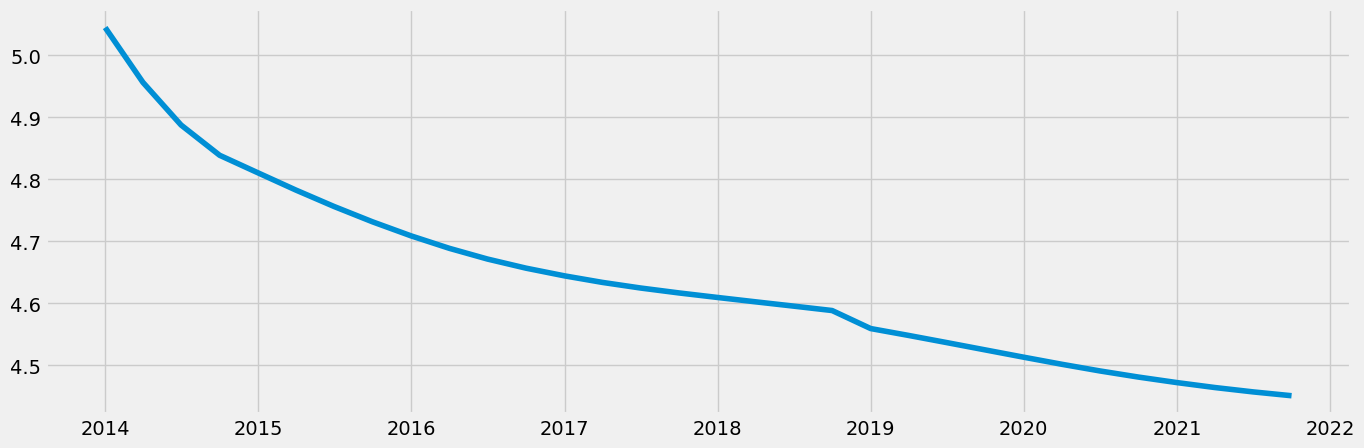

In [56]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.plot(data)

# Decompose Data

In [57]:
# Decompose time series using additive model
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [58]:
# Define fixed size for all charts
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

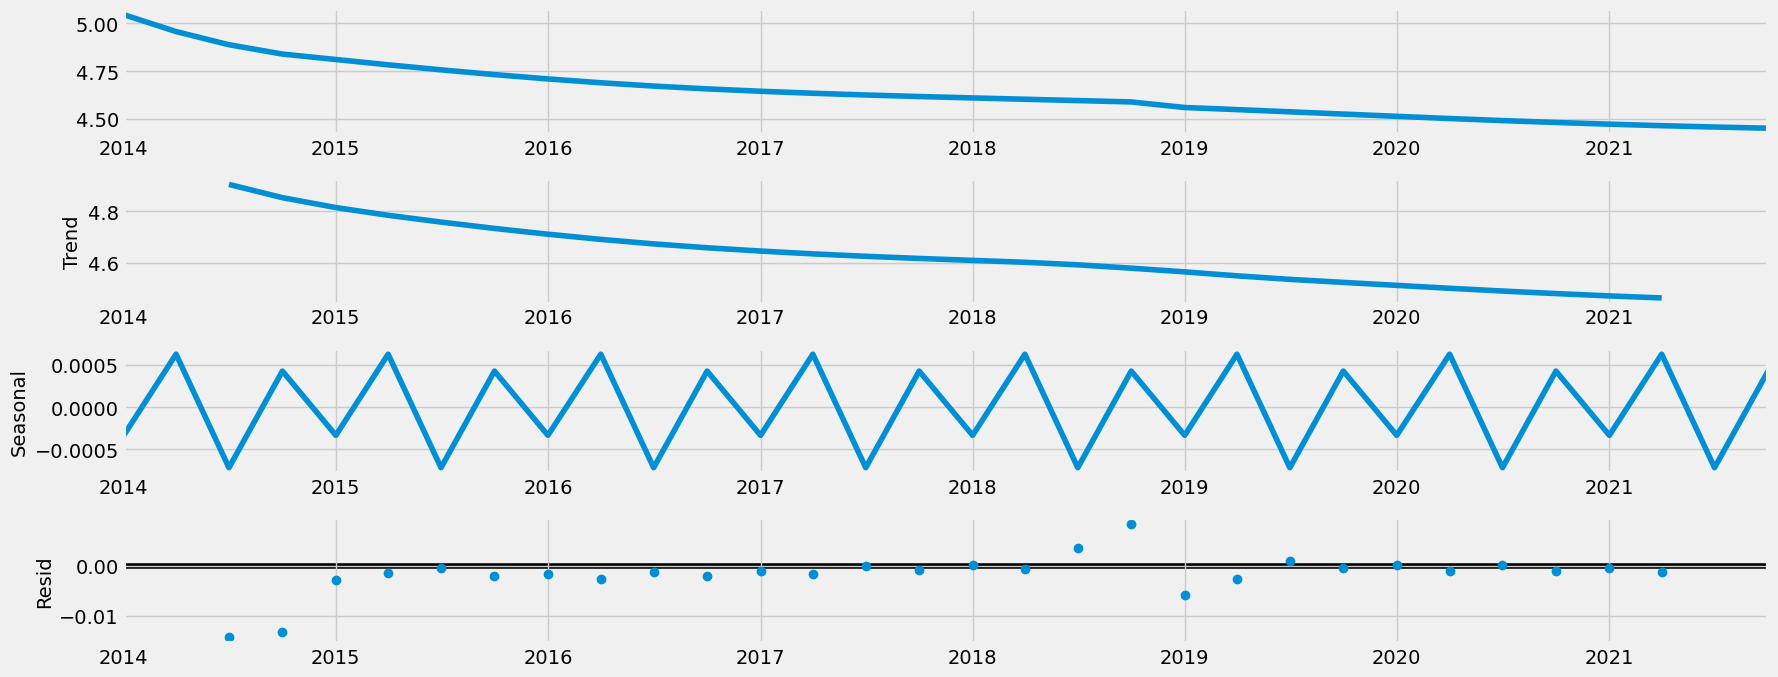

In [59]:
# Plot separate components

decomposition.plot()
plt.show()


Observations
The trend is a negative trend with slight variance
There is seasonality present in this data. 
There seems to be noise in the beginning and then decreases. 
I would expect this data to be non-stationary because there is a clear downward trend.

# Dickey-Fuller Test

In [60]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

# Define the function
def dickey_fuller(timeseries): 
    
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                -9.200301e+00
p-value                        2.010478e-15
Number of Lags Used            0.000000e+00
Number of Observations Used    3.100000e+01
Critical Value (1%)           -3.661429e+00
Critical Value (5%)           -2.960525e+00
Critical Value (10%)          -2.619319e+00
dtype: float64


Test Statistic -2.05 > critical value -2.94 

The null hypothesis is not rejected meaning that there is a unit root in the data.

The data is non-stationary.

In [61]:
#perform differencing
data_diff = data - data.shift(1)

In [62]:
#Remove missing values from differencing so dickey-fuller test can be done again
data_diff.dropna(inplace = True)

In [63]:
data_diff.head()

,Value
Date,
2014-04-01,-0.088491
2014-07-01,-0.068862
2014-10-01,-0.048870
2015-01-01,-0.028493
2015-04-01,-0.027708


In [64]:
data_diff.columns

Index(['Value'], dtype='object')

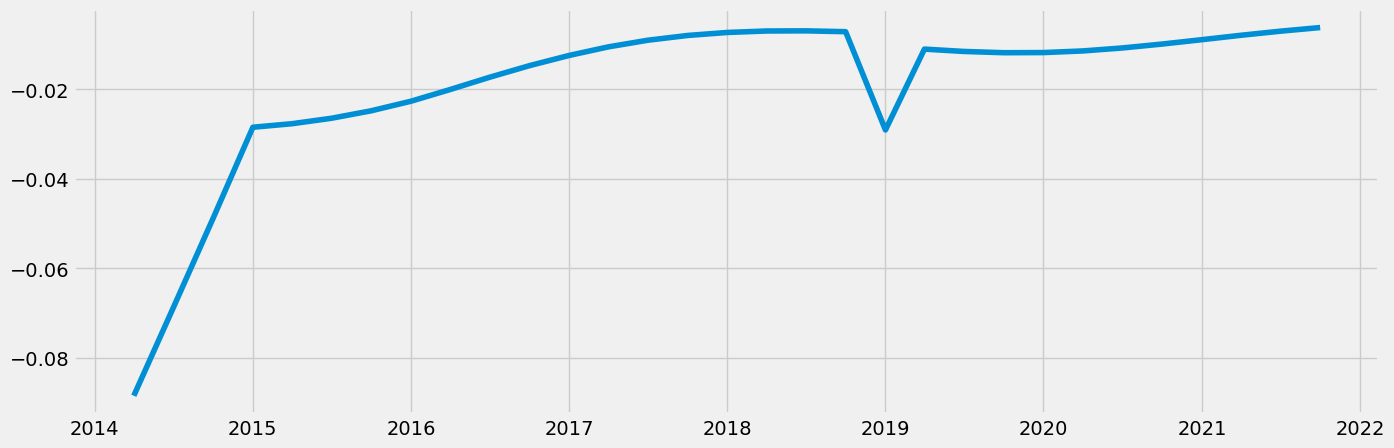

In [65]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [66]:
#run dickey-fuller test again
#can call dickey_fuller as it was defined previously
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.240486e+00
p-value                        4.710451e-08
Number of Lags Used            0.000000e+00
Number of Observations Used    3.000000e+01
Critical Value (1%)           -3.669920e+00
Critical Value (5%)           -2.964071e+00
Critical Value (10%)          -2.621171e+00
dtype: float64


Observations
test statistic, -3.6 < critical value (5%), -2.94.

The null hypothesis is rejected meaning that there is not a unit root in the data.

This can be determined because the test statistic is less than the critical value (we are working with a significance level of 5%).

The data is stationary.

# Check Autocorrelations

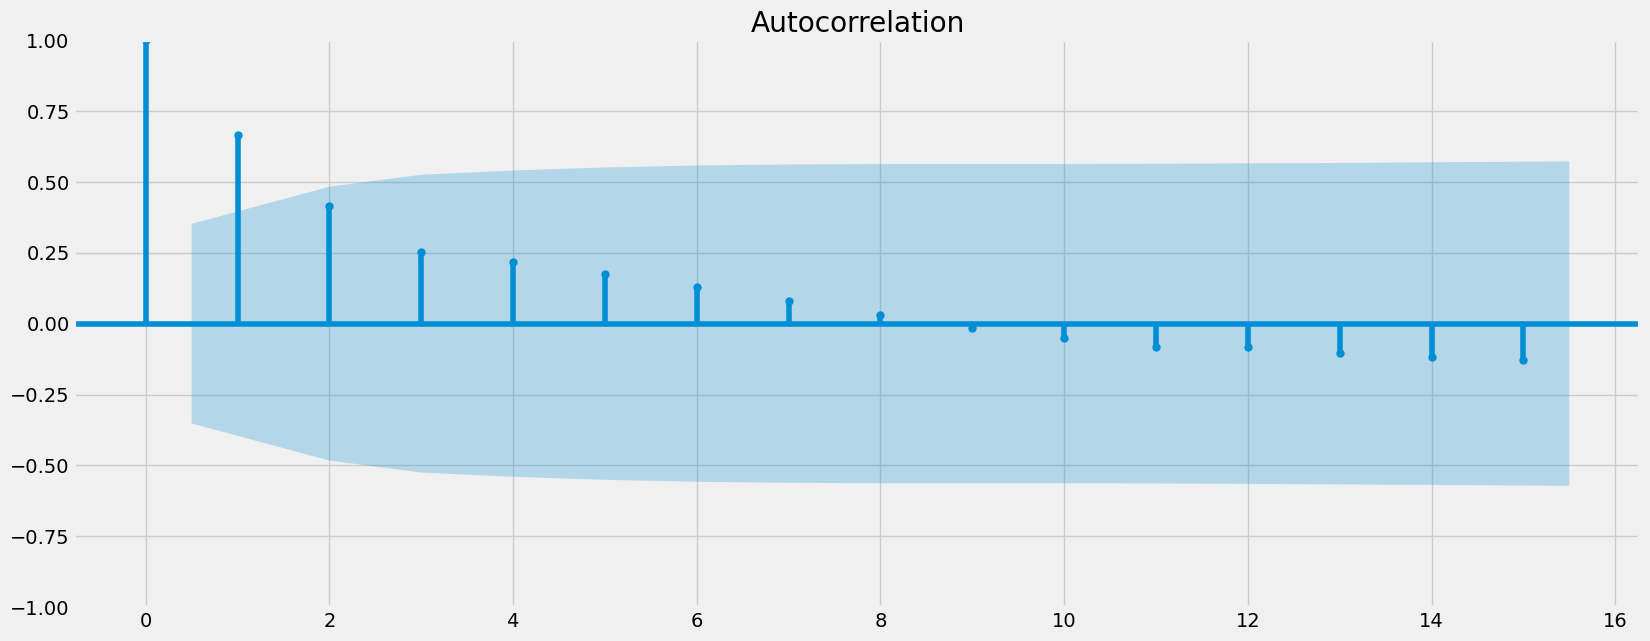

In [67]:
#Create a plot of autocorrelations

# Here, you import the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_diff)
plt.show()

The autocorrelation plot provides strong evidence of data stationarity, corroborating the Dickey-Fuller test results. It reveals three lags extending beyond the blue confidence interval edge, indicating robust stationarity. Further confirmation comes from the second Dickey-Fuller test, with a low p-value of 0.005651, which is below the acceptable threshold (p<0.05).

In [68]:
#export 'data'
data.to_csv(os.path.join(path, 'Cleaned Data', 'Time_Series.csv'))